In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_concat():
  df1 = pd.read_excel('Aracaju.xlsx')
  df2 = pd.read_excel('Fortaleza.xlsx')
  df3 = pd.read_excel('Natal.xlsx')
  df4 = pd.read_excel('Recife.xlsx')
  df5 = pd.read_excel('Salvador.xlsx')

  df = pd.concat([df1,df2,df3,df4,df5])

  return df

In [4]:
df = load_concat()

In [5]:
df

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [25]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [18]:
df['LojaID'].value_counts(ascending=False)


1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

In [26]:
df.groupby('LojaID')['Receita'].sum().sort_values(ascending=False)

LojaID
852     52744.00
854     46655.00
853     42469.00
983     23275.94
1036    22235.61
1035    17569.39
1037    16018.85
982     15664.53
1522    15103.92
980     13557.85
1520    12787.81
981     11651.25
1523    11435.04
1521     9421.48
1034     8463.75
1002     7010.05
1005     6122.07
1003     5906.37
1004     4014.34
Name: Receita, dtype: float64

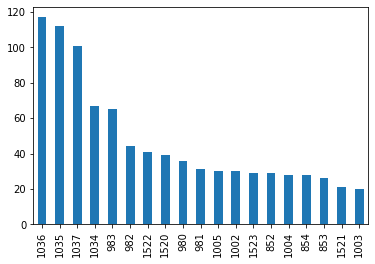

In [31]:
df['LojaID'].value_counts(ascending=False).plot.bar();

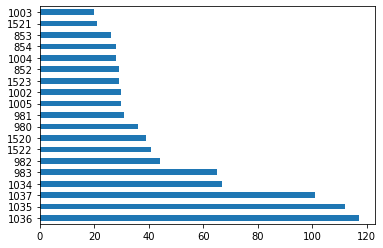

In [30]:
df['LojaID'].value_counts(ascending=False).plot.barh();

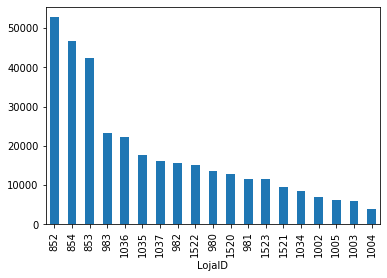

In [29]:
df.groupby('LojaID')['Receita'].sum().sort_values(ascending=False).plot.bar();

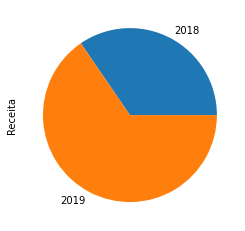

In [34]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

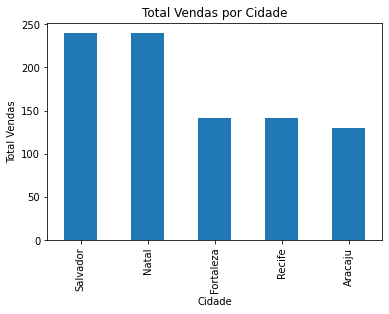

In [53]:
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade")
plt.xlabel("Cidade");
plt.ylabel("Total Vendas");

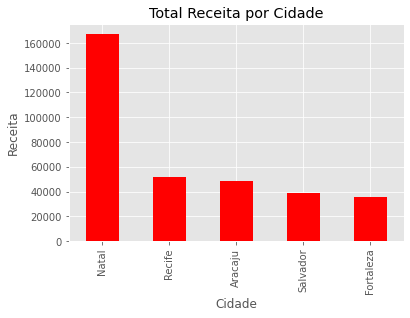

In [59]:
df.groupby("Cidade")['Receita'].sum().sort_values(ascending=False).plot.bar(title="Total Receita por Cidade", color="red");
plt.style.use("ggplot")
plt.xlabel("Cidade");
plt.ylabel("Receita");

In [58]:
#alterando o estilo
plt.style.use("ggplot")

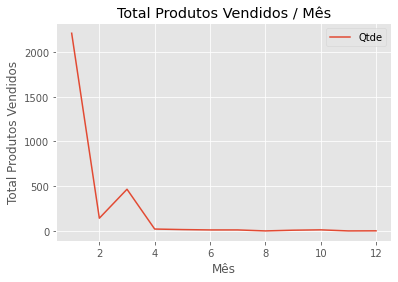

In [77]:
df.groupby(df['Data'].dt.month)["Qtde"].sum().plot(title='Total Produtos Vendidos / Mês');
plt.xlabel('Mês');
plt.ylabel('Total Produtos Vendidos');
plt.legend();

In [67]:
df.groupby(df['Data'].dt.month)["Qtde"].sum()

Data
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [71]:
filtro = df["Data"].dt.year == 2019
df2019 = df.loc[filtro]

In [75]:
df2019.groupby(df2019['Data'].dt.month)["Qtde"].sum()

Data
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

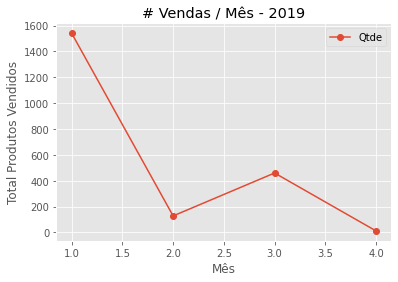

In [85]:
df2019.groupby(df2019['Data'].dt.month)["Qtde"].sum().plot(title='# Vendas / Mês - 2019',marker = "o");
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

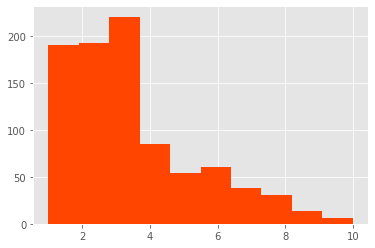

In [88]:
plt.hist(df['Qtde'], color='orangered');a

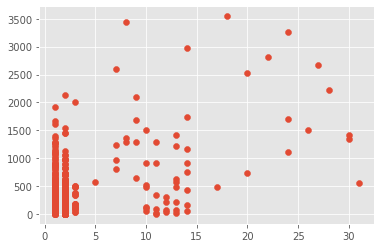

In [90]:
plt.scatter(x=df2019['Data'].dt.day, y=df2019['Receita']);

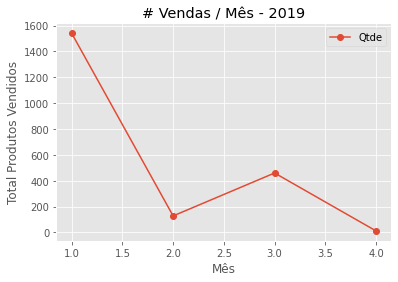

In [93]:
df2019.groupby(df2019['Data'].dt.month)["Qtde"].sum().plot(marker = "o");
plt.title('# Vendas / Mês - 2019');
plt.xlabel("Mês");
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.savefig('grafico-qtde-mes-2019.png')